# 🐷 Susie Package Test Notebook

### 🔷 Import the necessary python libraries and Susie objects.

Importing any packages and libraries needed, as well as the package from Test PyPi

In [1]:
import numpy as np
import pandas as pd
from susie.timing_data import TimingData
from susie.ephemeris import Ephemeris
import matplotlib.pyplot as plt
from astropy import coordinates as coords
from astropy import units as u
from astropy import time

<hr style="color: #D64309;">
<hr style="color: #D64309;">

## 🔵 Basic Usage

The basic creation and usage of the **TimingData** and **Ephemeris** objects. This will assume the following:

1. Your data is in JD TDB timing format and system
2. You have both transit and occultation data
3. You have mid time uncertainties included in your data

We will pull this data from the repository below.

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔷 **STEP 1:** Download the timing data (that includes occultations) from the GitHub repository

In [4]:
url = 'https://raw.githubusercontent.com/BoiseStatePlanetary/susie/main/wasp12b_tra_occ.csv'

# Read the CSV file directly from the URL
data = pd.read_csv(url)
tra_or_occs = np.array(data["tra_or_occ"])
epochs = np.array(data["epoch"].astype('int'))
mid_times = np.array(data["transit_time"])
mid_time_errs = np.array(data["sigma_transit_time"])

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔷 **STEP 2:** Add your transit and occultation data to the TimingData object.

In [5]:
# Create new transit times object with above data
timing_obj1 = TimingData('jd', epochs, mid_times, mid_time_errs, tra_or_occs, time_scale='tdb')

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔷 **STEP 3:** Create the Ephemeris object and add your TimingData object.

In [6]:
ephemeris_obj1 = Ephemeris(timing_obj1)

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔷 **STEP 4:** Fit your transit time data to an ephemeris model. You can specify what type of model with the options 'linear' or 'quadratic'.

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

##### 🔹 The **Linear** Model

In [23]:
# Getting a linear model will solve for period and conjuction time (and their respective errors)
linear_model_data = ephemeris_obj1.get_model_ephemeris('linear')

##### 🟢  EXAMPLE
Calling `get_model_ephemeris` will return a dictionary of data. Below is an example of the dictionary returned for `linear_model_data`:

```
{'period': 1.0914196400440928,
 'period_err': 4.21033087274383e-08,
 'conjunction_time': 0.0023543850341696416,
 'conjunction_time_err': 9.256430832207615e-05,
 'model_type': 'linear',
 'model_data': array([2.35438503e-03, 2.53757421e+02, 2.58123099e+02...])}

```

In [18]:
# Uncomment this ↓↓↓↓ to see the real data!

# for key, value in linear_model_data.items():
#     print(f"{key}: {value}\n")

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

##### 🔹 The **Quadratic** Model

We can do the same process for a quadratic model by specifying 'quadratic' for the model type instead of linear. The same process above is shown below for the quadratic model.

In [25]:
# Getting a quadratic model will solve for period, conjuction time, and period change per epoch (and their respective errors)
quadratic_model_data = ephemeris_obj1.get_model_ephemeris('quadratic')

##### 🟢  EXAMPLE
Below is an example of the dictionary returned for `quadratic_model_data`:

```
{'period': 1.0914217244026556,
'period_err': 1.543206321797526e-07,
'conjunction_time': 0.0005511865218625013,
'conjunction_time_err': 0.00014528672879359023,
'period_change_by_epoch': -9.902087992310958e-10,
'period_change_by_epoch_err': 7.206633676288036e-11,
'model_type': 'quadratic',
'model_data': array([5.51186522e-04, 2.53756075e+02, 2.58121761e+02, 3.20878495e+02...])}
```

In [27]:
# Uncomment this ↓↓↓↓ to see the real data!

# for key, value in quadratic_model_data.items():
#     print(f"{key}: {value}\n")

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔷 **STEP 5:** Get BIC Values

We can get the BIC value for a specific model fit using the model data dictionaries returned from the `get_model_ephemeris` method.

In [28]:
linear_bic_value = ephemeris_obj1.calc_bic(linear_model_data)
quadratic_bic_value = ephemeris_obj1.calc_bic(quadratic_model_data)

print(f"Linear Model BIC: {linear_bic_value}\nQuadratic Model BIC: {quadratic_bic_value}")

Linear Model BIC: 386.7189816462825
Quadratic Model BIC: 184.97948383585023


And we can also get a $\Delta$ BIC value using the method `calc_delta_bic`. We do not need to input any data for this method. It will create the linear and quadratic models for you and calculate the BIC values for each model, then calculate the $\Delta$ BIC value. 

Keep in mind, it <span style="color: #4BA5DD;">**ONLY returns the $\Delta$ BIC value**</span> and not the other data calculated.

In [32]:
delta_bic_value = ephemeris_obj1.calc_delta_bic()

print(f"\u0394 BIC: {delta_bic_value}")

Δ BIC: 201.73949781043225


<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>
<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

#### 🔷 **STEP 6:** Plot your data!

Now you can use the linear_model_data and quadratic_model_data dictionaries for plotting methods. Available plotting methods include:

* `plot_model_ephemeris`: This will plot the model predicted mid-times. This takes in a model data dictionary.
* `plot_timing_uncertainties`: This will plot the range of uncertainties for the model predicted mid-times. This takes in a model data dictionary.
* `plot_oc_plot`: This will plot the observed mid-times minus the model predicted mid-times (calculated with $x=E$, $y=T_0-PE$, $y_{\rm err}=\sigma T_0$) and a curve with the quadratic term ($x=E$, $y=0.5 \frac{dP}{dE} (E - {\rm median} (E))^2$). This **DOES NOT** take a model data dictionary.
* `plot_running_delta_bic`: This will plot how the $\Delta$ BIC value changes over time. This **DOES NOT** take a model data dictionary.

<!-- You can use the same process for a quadratic model ephemeris (shown below). -->

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

##### 🔹 Plot the ephemeris

🔹 For the Linear Ephemeris

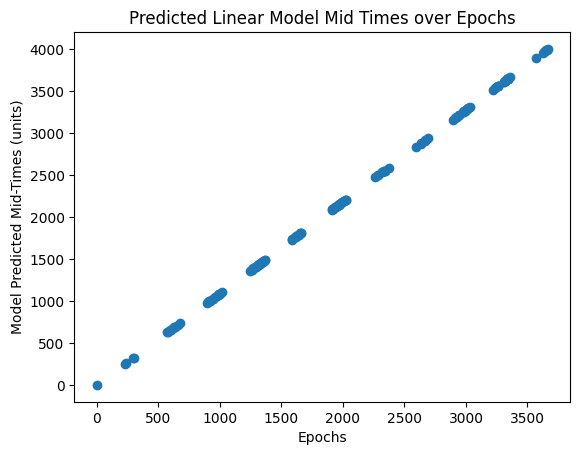

In [19]:
# Now we can plot this model
ephemeris_obj1.plot_model_ephemeris(linear_model_data, save_plot=False)

🔹 For the Quadratic Ephemeris

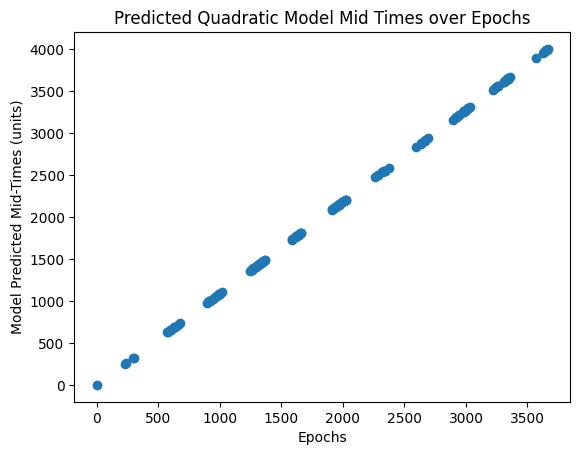

In [35]:
# Now we can plot this model
ephemeris_obj1.plot_model_ephemeris(quadratic_model_data, save_plot=False)

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

##### 🔹 Plot the ephemeris uncertainties

🔹 For the Linear Ephemeris

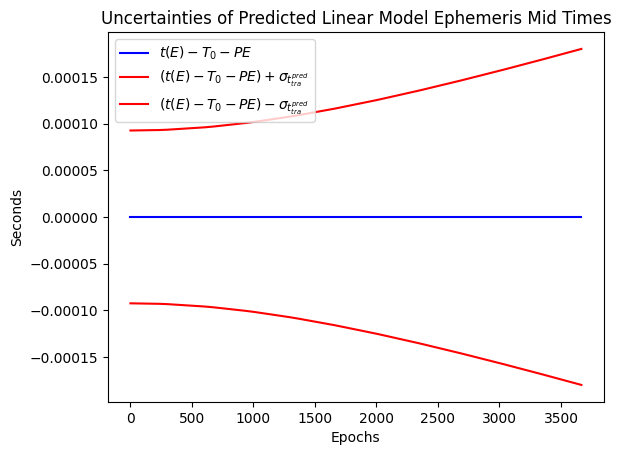

In [20]:
ephemeris_obj1.plot_timing_uncertainties(linear_model_data, save_plot=False)

🔹 For the Quadratic Ephemeris

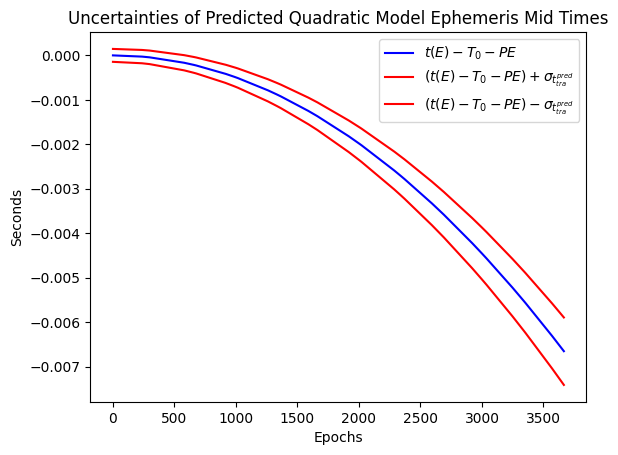

In [34]:
ephemeris_obj1.plot_timing_uncertainties(quadratic_model_data, save_plot=False)

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

##### 🔹 The O-C Plot

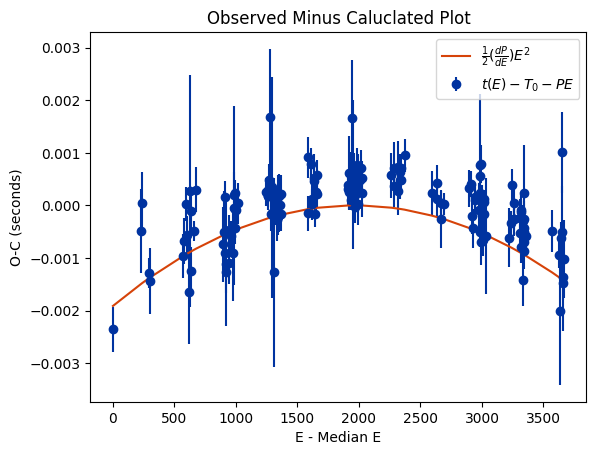

In [33]:
ephemeris_obj1.plot_oc_plot()

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

##### 🔹 Plot the running $\Delta$ BIC

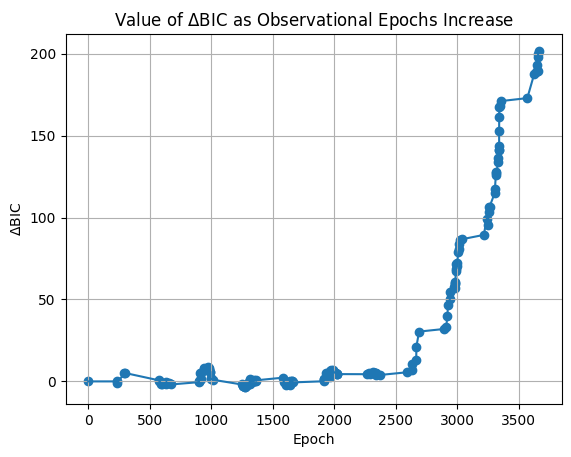

In [36]:
ephemeris_obj1.plot_running_delta_bic()

<hr style="color: #D64309;">
<hr style="color: #D64309;">

## 🔵 Other Timing Data Formats and Options

The default option (shown in the example above) for timing data:

* Is in JD TDB timing format and system
* Includes mid-time uncertainties
* Includes both transits AND occultations

However, there are a number of options you have for creating timing objects. A few include:

* Timing formats and systems different from JD TDB. For example, you can specify that your data is in JD with UTC timing system. If you do not specify the timing system, the code will default to UTC and will automatically correct for barycentric light travel time.

    <small> NOTE: If you choose to specify a different timing format and/or systems, or if you choose not to specify the timing system, REMEMBER the code will automatically convert your time to JD TDB timing format and system. If this happens, you will need to include some additional information including the position of your object in the sky (in RA and Dec) and the position of your observing location on Earth (in longitude and latitude). You ARE REQUIRED to input the coordinates of your object. You ARE NOT REQUIRED to specify your location on Earth, but this will generate a default position on Earth that corresponds to the North Pole.</small>

* No mid-time uncertainties. In this case, a placeholder list of 1s will be generated for functional purposes.

* No list specifying transits and occultations. If you do not include a list specifying if the data included is a transit or occultation (this will be the tra_or_occ parameter), then the code defaults to transits and will generate a list of 'tra' that has a number of values equal to the number of values of your epochs array.

Below are examples of how these options would work.

<hr style="color: #D64309;">

### 🔷 Using Timing Data that is NOT in JD TDB Format and System

Using timing data that is not corrected for barcentric light travel time and is in a timing format and system other than JD TDB. For example, we will assume this data is in the JD timing format with the UTC time scale. 

<small>NOTE: If you do not include a timing system parameter when you create the TimingData object, it will default to UTC and correct for barycentric light travel time</small>

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

### 🔹 Option 1: Including BOTH Object Coordinates and Observatory Coordinates

For this example, we show creating the object:
* WITHOUT specifying the timing system, which will default to UTC
* WITH specifying the timing system as UTC

<small>Note: These will both be the exact same because if the object is not given a timing system, it will default to UTC.</small>


We also include positional data for both:
* the **object coordinates**, which includes the right ascension and declination of WASP 12-b
* the **location of the observatory**, which includes the latitude and longitude of the Boise State observatory. 

<small>Note: This data was not collected from the BSU observatory, we just use this as an example. Also note, this data is already corrected for barycentric light travel time, so the resulting data is not actually correct. This is JUST AN EXAMPLE. </small>

In [40]:
# Not including time scale. Will default to UTC
timing_obj2 = TimingData('jd', epochs, mid_times, mid_time_errs, object_ra=97.64, object_dec=29.67, observatory_lat=43.60, observatory_lon=-116.21)
# OR including time scale as UTC
timing_obj2 = TimingData('jd', epochs, mid_times, mid_time_errs, time_scale='utc', object_ra=97.64, object_dec=29.67, observatory_lat=43.60, observatory_lon=-116.21)

In [42]:
vars(timing_obj2)

{'transits': None,
 'occultations': None,
 'epochs': array([   0,  232,  236,  294,  298,  573,  579,  594,  602,  622,  629,
         636,  637,  655,  677,  897,  901,  911,  912,  918,  919,  941,
         941,  963,  972,  982,  985,  992,  994,  995,  997, 1015, 1247,
        1257, 1258, 1260, 1272, 1278, 1287, 1290, 1290, 1311, 1311, 1312,
        1313, 1316, 1317, 1323, 1324, 1333, 1334, 1344, 1345, 1346, 1347,
        1357, 1365, 1366, 1585, 1589, 1611, 1619, 1621, 1633, 1637, 1640,
        1653, 1661, 1662, 1914, 1915, 1916, 1917, 1937, 1938, 1945, 1948,
        1960, 1964, 1967, 1968, 1969, 1978, 1981, 1991, 1996, 2005, 2012,
        2019, 2021, 2022, 2264, 2286, 2288, 2318, 2319, 2331, 2332, 2338,
        2339, 2371, 2593, 2634, 2635, 2667, 2668, 2690, 2892, 2910, 2921,
        2924, 2942, 2943, 2978, 2979, 2981, 2984, 2985, 2988, 2992, 2992,
        2997, 2999, 3010, 3017, 3018, 3019, 3037, 3217, 3239, 3248, 3260,
        3261, 3264, 3306, 3307, 3314, 3316, 3318, 3335, 3335

Then you can go 

<hr style="border: 1px dotted #ff0000; border-style: none none dotted; color: #D64309;"/>

<hr style="color: #D64309;">